# 🔬 Deep Learning Algorithms

This notebook presents a theoretical and practical introduction to four of the most important architectures in deep learning:

- **CNN** (Convolutional Neural Networks) – images
- **RNN** (Recurrent Neural Networks) – time series and sequential text
- **Transformers** – parallel sequence processing, modern NLP
- **GNN** (Graph Neural Networks) – relationships between nodes and edges

In order to do so, we will use TensorFlow and Keras, the most commonly used libraries for building neural networks.

## Intro to Tensorflow y Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


### What is TensorFlow?

TensorFlow is an open-source platform developed by Google for **building and training** machine learning and deep learning models. It supports the use of CPU, GPU, or TPU.

### What is Keras?

Keras is a high-level API integrated into TensorFlow that enables building models in a faster, more modular, and intuitive way.


## CNN - Convolutional Neural Network

### What is a CNN?

Convolutional Neural Networks are designed to work with data that has **spatial structure**, such as images. They learn filters that extract patterns like edges, shapes, and textures.

🧠 **Typical uses**: Image classification, object detection, facial recognition.


### Example with MNIST dataset

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess
x_train = x_train[..., tf.newaxis] / 255.0
x_test = x_test[..., tf.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Simple CNN
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # Convolutional layer: 32 filters of size 3x3
    layers.MaxPooling2D((2,2)),  # Dimensionality reduction (stride 2)
    layers.Flatten(),            # Flatten 2D matrix to 1D vector
    layers.Dense(64, activation='relu'),  # Fully connected dense layer
    layers.Dense(10, activation='softmax')  # Output with 10 classes and softmax (multiclass classification)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

- Conv2D extracts local patterns (edges, shapes).
- MaxPooling2D reduces resolution and helps prevent overfitting.
- Flatten converts the data into vector format for dense layers.
- Dense performs classification as in a traditional neural network.
- Softmax transforms the logits into probabilities (sum = 1).

In [3]:
# Train model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.8792 - loss: 0.4299 - val_accuracy: 0.9785 - val_loss: 0.0796
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9781 - loss: 0.0733 - val_accuracy: 0.9842 - val_loss: 0.0607
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9855 - loss: 0.0478 - val_accuracy: 0.9852 - val_loss: 0.0548
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9897 - loss: 0.0338 - val_accuracy: 0.9798 - val_loss: 0.0669
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9909 - loss: 0.0280 - val_accuracy: 0.9877 - val_loss: 0.0475



✅ Test accuracy: 0.9861
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


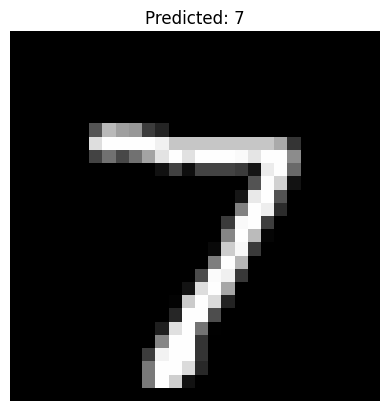

In [4]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test accuracy: {test_acc:.4f}")

# Predict on a test image
idx = 0  # Index of the test image
sample = x_test[idx][np.newaxis, ...] # Add batch size

prediction = model.predict(sample)
predicted_class = prediction.argmax()

# Show result
plt.imshow(x_test[idx].squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

## RNN - Recurrent Neural Network

### What is an RNN?

RNNs are designed to process **sequential data**, such as text, audio, or time series. They maintain an internal "memory" that helps relate data at different steps in the sequence.

🧠 **Typical uses**: Text prediction, machine translation, sentiment analysis, time series forecasting.

### Example of text generation with an LSTM RNN

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

corpus = [
    "I love deep learning",
    "Deep learning loves me",
    "I love TensorFlow",
    "I love AI"
]

# Tags
y = np.array([1, 1, 0, 0])

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
X = pad_sequences(sequences, padding='post')
input_length = X.shape[1]

# Simple LSTM model
model = keras.Sequential([
    layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8), # Encode words into dense vectors
    layers.LSTM(16),                                                       # Recurrent layer with 16 units
    layers.Dense(1, activation='sigmoid')                                  # Binary output (0 or 1)
])
model.build(input_shape=(None, input_length))

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 4, 8)           │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 16)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,689 (6.60 KB)

 Trainable params: 1,689 (6.60 KB)

 Non-trainable params: 0 (0.00 B)

- Embedding converts tokens into learnable dense vectors (ideal for text).
- LSTM can “remember” long sequences better than a simple RNN.
- Dense + sigmoid is used for binary classification.

In [6]:
# Train model
model.fit(X, y, epochs=20, verbose=1)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6922
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.6919
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6916
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.6912
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.6908
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.6905
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.6901
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.6896
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.6892
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6887
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.6882
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6876
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6871
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.6865
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.6858
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━

In [7]:
test_sentences = [
    "I love AI",           # Expected from training → 0
    "Deep learning rocks", # Unseen sentence but related → likely classified as 1
    "I love deep",         # Partially seen → likely classified as 1
    "TensorFlow is great", # New sentence with a known word → uncertain classification
]

# Preprocess the test sentences (token convertion)
test_sequences = tokenizer.texts_to_sequences(test_sentences)
X_test = pad_sequences(test_sequences, padding='post', maxlen=input_length)

# Predictions
predictions = model.predict(X_test)

for sentence, prob in zip(test_sentences, predictions):
    label = 1 if prob >= 0.5 else 0
    print(f"Sentence: '{sentence}' → Prob: {prob[0]:.4f} → Predicted class: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Sentence: 'I love AI' → Prob: 0.4953 → Predicted class: 0
Sentence: 'Deep learning rocks' → Prob: 0.5009 → Predicted class: 1
Sentence: 'I love deep' → Prob: 0.4994 → Predicted class: 0
Sentence: 'TensorFlow is great' → Prob: 0.4941 → Predicted class: 0


## Transformers

### What is a Transformer?

Transformers process sequences in parallel (not step-by-step like RNNs) using **attention mechanisms** to assign "weight" to the most relevant parts of the sequence.

🧠 **Typical uses**: Chatbots, machine translation, text classification, models like BERT and GPT.

### Conceptual example of a small model

In [8]:
# Simple attention layer
class SimpleSelfAttention(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.q = layers.Dense(units)  # Layer to compute queries
        self.k = layers.Dense(units)  # Layer to compute keys
        self.v = layers.Dense(units)  # Layer to compute values

    def call(self, x):
        q = self.q(x)
        k = self.k(x)
        v = self.v(x)
        attention = tf.nn.softmax(tf.matmul(q, k, transpose_b=True), axis=-1)  # Attention: similarity between queries and keys
        return tf.matmul(attention, v)                                         # Weights the values by attention

# Apply of the model to a sentence
inputs = layers.Input(shape=(10, 64))
attention_output = SimpleSelfAttention(32)(inputs)
model = keras.Model(inputs, attention_output)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_self_attention           │ (None, 10, 32)         │         6,240 │
│ (SimpleSelfAttention)           │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,240 (24.38 KB)

 Trainable params: 6,240 (24.38 KB)

 Non-trainable params: 0 (0.00 B)

This model computes attention between all elements of the sequence:

- Uses dot product between query and key → to determine how related the tokens are
- Then multiplies by value → to gather the relevant information

## GNN - Graph Neural Networks

GNNs allow working with data that has **graph structure** (nodes and connections), such as social networks, molecules, maps, etc.

Each node learns vector representations (embeddings) by considering its neighbors.

🧠 **Typical uses**: Recommendations, molecular prediction, relationship analysis (Knowledge Graphs).


### Conceptual example

In [9]:
!pip install -q torch-geometric
import torch

In [10]:
# PyTorch Geometric: simple GCN model
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

## Comparison

| Architecture | Ideal for...                   | Advantages                  | Disadvantages                     |
| ------------ | ------------------------------ | ------------------------------------------------------- | --------------------------------- |
| CNN          | Images, video, computer vision | Very efficient in 2D, few parameters (spatial patterns) | Not suitable for sequences        |
| RNN / LSTM   | Text, audio, time series       | Remembers context from previous steps                   | Slower, harder to train           |
| Transformers | Long text, modern NLP          | Parallel processing, more powerful                      | Requires lots of data and compute |
| GNN          | Graphs, networks, molecules    | Learns from relational structure                        | Requires specific libraries       |


## (APPENDIX A) Transfer Learning

Transfer Learning consists of **reusing a pre-trained model** (usually trained on a large dataset like ImageNet) and adapting it to your specific problem.

There are two approaches:

1. **Feature Extraction**: Freeze the base model and only train a new output layer.
2. **Fine-Tuning**: Allow some layers of the base model to continue learning on your dataset.

### Example of Transfer Learning with MobileNetV2 (with dummy data)

In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input

# Dummy data
X_train = np.random.rand(100, 224, 224, 3).astype(np.float32)
y_train = tf.keras.utils.to_categorical(np.random.randint(0, 2, size=(100,)), num_classes=2)

X_val = np.random.rand(20, 224, 224, 3).astype(np.float32)
y_val = tf.keras.utils.to_categorical(np.random.randint(0, 2, size=(20,)), num_classes=2)

# Load pre-trained model without the final layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Initially freeze all layers
base_model.trainable = False

# Add your own classification layer
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(2, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# First train the model for our data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5182 - loss: 1.0369 - val_accuracy: 0.6000 - val_loss: 0.6855
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4963 - loss: 0.8150 - val_accuracy: 0.6500 - val_loss: 0.6606
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4342 - loss: 0.7305 - val_accuracy: 0.4000 - val_loss: 0.8623
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5464 - loss: 0.7519 - val_accuracy: 0.4500 - val_loss: 0.7041
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5127 - loss: 0.6848 - val_accuracy: 0.6000 - val_loss: 0.6601


#### Fine-Tuning: Unfreeze and retrain some layers

In [12]:
# Allow to retrain the last layers of the base model
base_model.trainable = True

# Choose how many layers to unfreeze
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile (adjust learning rate)
model.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Retrain with fine-tuning
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.4773 - loss: 0.9124 - val_accuracy: 0.6500 - val_loss: 0.6665
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4979 - loss: 0.8009 - val_accuracy: 0.6500 - val_loss: 0.6712
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5142 - loss: 0.7202 - val_accuracy: 0.6500 - val_loss: 0.6755
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6213 - loss: 0.5846 - val_accuracy: 0.6000 - val_loss: 0.6802
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5692 - loss: 0.5997 - val_accuracy: 0.5500 - val_loss: 0.6839


## (APPENDIX B) Fine-Tuning in different types of Models

Fine-tuning means taking an already trained (or pre-trained) model and slightly adjusting it for a new, specific problem or dataset.

**Why do Fine-Tuning?**
- To save time and computing resources, since you reuse learned weights.
- To improve performance by leveraging prior knowledge.
- Ideal when you have limited data of your own.

### Fine-Tuning in Deep Learning

In order:

1. Load a pre-trained model (e.g., an image CNN trained on ImageNet)
2. Remove or adapt the final output layer to match your task
3. Freeze the initial layers (they won’t be trained)
4. Train only the final part
5. Then “unfreeze” some layers and retrain the whole model with a lower learning rate

### Fine-tuning in Tree-Based Models (Random Forest, XGBoost)

You can tune hyperparameters based on an already trained model.

In XGBoost or LightGBM, you can use the `xgb_model=previous_model` to continue training.

```
import xgboost as xgb

# Initial dataset
model1 = xgb.train(params, dtrain, num_boost_round=50)

# Fine-tuning with more data
model2 = xgb.train(params, dtrain_new, num_boost_round=20, xgb_model=model1)
```

### Fine-tuning in Linear Models (Regression, SVM)

There is no true "fine-tuning" as in deep learning, but you can:

- Use the coefficients from a previous model as a starting point for another model (in frameworks that support it).
- Change regularization (C in SVM, alpha in Ridge/Lasso) and retrain with new data.

### Fine-tuning in Pretrained Embeddings

If you're using TF-IDF, Word2Vec, etc., you can:

* Use the already trained embeddings
* Train a new classification model on top of them → this is a type of transfer + fine-tuning

In modern NLP with transformers (like BERT):
1. Use a pretrained model from Hugging Face
2. Add a classification layer
3. Retrain it on your dataset (this is pure fine-tuning)

### Conclusion

| Model Type    | Is Fine-tuning Possible? | How It’s Applied?                                           |
| ---------------------------- | --------------------- | ----------------------------------------------------------------------------------------- |
| **CNN / RNN / Transformers** | ✅ Yes                 | Freezing pretrained layers, adding new output layers, retraining with a low learning rate |
| **XGBoost / LightGBM**       | ✅ Yes                 | Continuing training with new data using *xgb_model*                                       |
| **Regression / SVM**         | ⚠️ Limited            | Tuning hyperparameters, reusing coefficients as a starting point (if supported)           |
| **Classic NLP Models**       | ✅ Yes                 | Using pretrained embeddings (TF-IDF, Word2Vec) as input for new classifiers        |
| **Transformers (BERT, GPT)** | ✅ Yes (very common)   | Adding a classification head and retraining the whole model or part of it                 |

